## Project Title: Quotes Classification using NLP

#### Importing Libraries

In [34]:
import requests
from bs4 import BeautifulSoup as bs4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

#### Website url details and target category extraction

In [45]:
url = 'https://www.brainyquote.com/topics/attitude-quotes'

In [22]:
quotes_data = []

In [23]:
quotes_url = url.split('/')
quotes_url

['https:', '', 'www.brainyquote.com', 'topics', 'attitude-quotes']

In [24]:
quotes_cat = quotes_url[-1]
quotes_cat

'attitude-quotes'

##### Website RAW data collection

In [70]:
data = requests.get(url)
data.content[:200]

b'\n<!DOCTYPE html>\n<html lang="en">\n<head>\n<title>Music Quotes - BrainyQuote</title>\n<meta name="robots" content="all">\n<meta charset="utf-8" />\n<meta name="viewport" content="width=device-width, initia'

#### Web Scrapping HTML Content form Website Raw Data

In [73]:
soup = BeautifulSoup(data.content, 'html.parser')
soup


<!DOCTYPE html>

<html lang="en">
<head>
<title>Music Quotes - BrainyQuote</title>
<meta content="all" name="robots"/>
<meta charset="utf-8">
<meta content="width=device-width, initial-scale=1.0, viewport-fit=cover" name="viewport"/><meta content="Explore 1000 Music Quotes by authors including Bob Marley, Friedrich Nietzsche, and Plato at BrainyQuote." name="description"/>
<meta content="NOODP" name="googlebot"/>
<meta content="12.5.5:4534226" property="ver"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="none" name="msapplication-config"/>
<meta content="yes" name="apple-mobile-web-app-capable"/>
<meta content="1631937872" property="ts"/>
<meta content="BrainyQuote" property="og:site_name"/>
<meta content="Music Quotes - BrainyQuote" property="og:title"/>
<meta content="article" property="og:type"/>
<meta content="Explore 1000 Music Quotes by authors including Bob Marley, Friedrich Nietzsche, and Plato at BrainyQuote." property="og:description"/>
<meta content

### Standard Content Extraction using using BS
* Here we are extracting qoutes for a single category .
* Later the same way we will customize a function that will return quotes from multiple categories.

In [39]:
quotes_list_result= []
for quote_tag in soup.find_all(title='view quote'):
                quotes_list_result.append(quote_tag.text)

In [44]:
quotes_list_result

["\n\nAbility is what you're capable of doing. Motivation determines what you do. Attitude determines how well you do it.\n\n\n",
 '\n\nA positive attitude can really make dreams come true - it did for me.\n\n\n',
 '\n\nYour attitude, not your aptitude, will determine your altitude.\n\n\n',
 '\n\nPeople may hear your words, but they feel your attitude.\n\n\n',
 "\n\nExcellence is not a skill, it's an attitude.\n\n\n",
 ' ',
 '\n\nActing is magical. Change your look and your attitude, and you can be anyone.\n\n\n',
 "\n\nMy attitude is, if someone's going to criticize me, tell me to my face.\n\n\n",
 '\n\nTime plays a role in almost every decision. And some decisions define your attitude about time.\n\n\n',
 '\n\nYou cannot control what happens to you, but you can control your attitude toward what happens to you, and in that, you will be mastering change rather than allowing it to master you.\n\n\n',
 '\n\nThe attitude is very important. Because, your behavior radiates how you feel.\n\n

#### Categories to extract data(Customizable)

In [79]:
url_list =['https://www.brainyquote.com/topics/motivational-quotes',
            'https://www.brainyquote.com/topics/attitude-quotes',
            'https://www.brainyquote.com/topics/relationship-quotes',
            'https://www.brainyquote.com/topics/music-quotes',
          'https://www.brainyquote.com/topics/motivational-quotes_2',
            'https://www.brainyquote.com/topics/attitude-quotes_2',
            'https://www.brainyquote.com/topics/relationship-quotes_2',
            'https://www.brainyquote.com/topics/music-quotes_2',
          'https://www.brainyquote.com/topics/motivational-quotes_3',
            'https://www.brainyquote.com/topics/attitude-quotes_3',
            'https://www.brainyquote.com/topics/relationship-quotes_3',
            'https://www.brainyquote.com/topics/music-quotes_3',
          'https://www.brainyquote.com/topics/motivational-quotes_4',
            'https://www.brainyquote.com/topics/attitude-quotes_4',
            'https://www.brainyquote.com/topics/relationship-quotes_4',
            'https://www.brainyquote.com/topics/music-quotes_4']

In [80]:

def quotesScrapper(url_list): 
    """
     @author: Anjum Hassan
     This method takes url list as arugment and returns quotes for all categories in the list as dataframe
    """
    all_quotes =[]
    
    for url in url_list:
        quotes_url = url.split('/')
        quotes_cat = quotes_url[-1]

        data = requests.get(url)    
        soup = BeautifulSoup(data.content, 'html.parser')

        ind_quotes =[{'quotes':quote_tag.text,'quotes_category':quotes_cat} for quote_tag in soup.find_all(title='view quote')]

        all_quotes.extend(ind_quotes)

    df_qoutes = pd.DataFrame(all_quotes)
    return df_qoutes   

help(quotesScrapper)

Help on function quotesScrapper in module __main__:

quotesScrapper(url_list)
    @author: Anjum Hassan
    This method takes url list as arugment and returns quotes for all categories in the list as dataframe



#### Raw quotes extraction using custom function

In [82]:
df = quotesScrapper(url_list)
df

,quotes,quotes_category
0,"\n\nGood, better, best. Never let it rest. 'Ti...",motivational-quotes
1,\n\nIt always seems impossible until it's done...,motivational-quotes
2,\n\nLife is 10% what happens to you and 90% ho...,motivational-quotes
3,\n\nStart where you are. Use what you have. Do...,motivational-quotes
4,"\n\nWhen something is important enough, you do...",motivational-quotes
...,...,...
1009,\n\nMusic videos are like tools that young art...,music-quotes_4
1010,"\n\nA sense of the universe, a sense of the al...",music-quotes_4
1011,\n\nI don't consider myself a great drummer. I...,music-quotes_4
1012,\n\nOld music used to mean something. There is...,music-quotes_4


In [83]:
df['quotes_category'] = df['quotes_category'].apply(lambda x : x.split('-',1)[0])

In [85]:
df.head()

,quotes,quotes_category
0,"\n\nGood, better, best. Never let it rest. 'Ti...",motivational
1,\n\nIt always seems impossible until it's done...,motivational
2,\n\nLife is 10% what happens to you and 90% ho...,motivational
3,\n\nStart where you are. Use what you have. Do...,motivational
4,"\n\nWhen something is important enough, you do...",motivational


#### Text wrangling and pre-processing
* Standard steps for text processing before classification:
   * Parse data using request(RAW) and beautiful soup (HTML parsing) and get in  data frame.
   * Remove HTML parser.
   * Removing accented letter.
   * Removing special characters.
   * Apply lemmatization , stemming.
   * Remove stop-words excluding domain specific keywords. 

In [111]:
import spacy
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
import unicodedata


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anjum\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Downloading stop-words and NLP contents

In [112]:
nlp = spacy.load('en_core_web_sm')
nltk.download('stopwords')

stopword_list = nltk.corpus.stopwords.words('english')

# custom removal of stopwords that may helkp to identify sentiments.
stopword_list.remove('no') 
stopword_list.remove('not')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anjum\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Remove HTML Tags

In [90]:
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

In [91]:
df['quotes'] = df['quotes'].apply(strip_html_tags)

In [92]:
df.head()

,quotes,quotes_category
0,"\n\nGood, better, best. Never let it rest. 'Ti...",motivational
1,\n\nIt always seems impossible until it's done...,motivational
2,\n\nLife is 10% what happens to you and 90% ho...,motivational
3,\n\nStart where you are. Use what you have. Do...,motivational
4,"\n\nWhen something is important enough, you do...",motivational


#### Remove accented characters

In [93]:
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

In [94]:
df['quotes'] = df['quotes'].apply(remove_accented_chars)

In [95]:
df.head()

,quotes,quotes_category
0,"\n\nGood, better, best. Never let it rest. 'Ti...",motivational
1,\n\nIt always seems impossible until it's done...,motivational
2,\n\nLife is 10% what happens to you and 90% ho...,motivational
3,\n\nStart where you are. Use what you have. Do...,motivational
4,"\n\nWhen something is important enough, you do...",motivational


#### Remove special characters

In [105]:
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    text = re.sub("\n","",text)
    return text

In [106]:
df['quotes'] = df['quotes'].apply(remove_special_characters)

In [107]:
df.head()

,quotes,quotes_category
0,Good better best Never let it rest Til your go...,motivational
1,It always seems impossible until its done,motivational
2,Life is 10 what happens to you and 90 how you ...,motivational
3,Start where you are Use what you have Do what ...,motivational
4,When something is important enough you do it e...,motivational


#### Text Lemmatization 
* As we wanted to extract only dictionary words , we used lemmatization instead of stemming.

In [108]:
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

In [109]:
df['quotes'] = df['quotes'].apply(lemmatize_text)

In [110]:
df.head()

,quotes,quotes_category
0,good well well never let it rest Til your good...,motivational
1,it always seem impossible until its do,motivational
2,life be 10 what happen to you and 90 how you r...,motivational
3,start where you be use what you have do what y...,motivational
4,when something be important enough you do it e...,motivational


### Remove stopwords

In [116]:
def remove_stopwords(text, is_lower_case=False):
    tokenizer = ToktokTokenizer()
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [117]:
df['quotes'] = df['quotes'].apply(remove_stopwords)

In [118]:
df.head()

,quotes,quotes_category
0,good well well never let rest Til good well we...,motivational
1,always seem impossible,motivational
2,life 10 happen 90 react,motivational
3,start use,motivational
4,something important enough even odd not favor,motivational


### EDA on Cleaned Text Data

#### Named Entity Recognition

In [129]:
def ner_extractor(sentence_list):
    named_entities = []
    for sentence in sentence_list:
        temp_entity_name = ''
        temp_named_entity = None
        sentence = nlp(sentence)
        for word in sentence:
            term = word.text 
            tag = word.ent_type_
            if tag:
                temp_entity_name = ' '.join([temp_entity_name, term]).strip()
                temp_named_entity = (temp_entity_name, tag)
            else:
                if temp_named_entity:
                    named_entities.append(temp_named_entity)
                    temp_entity_name = ''
                    temp_named_entity = None

    entity_frame = pd.DataFrame(named_entities, 
                                columns=['Entity Name', 'Entity Type'])
    return entity_frame

In [138]:
entity_frame = ner_extractor(df['quotes'].to_list())
entity_frame.head()

,Entity Name,Entity Type
0,10,CARDINAL
1,yesterday,DATE
2,today,DATE
3,one,CARDINAL
4,first,ORDINAL


#### Most frequent Named Entities 

In [135]:
top_entities = (entity_frame.groupby(by=['Entity Name', 'Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.head()

,Entity Name,Entity Type,Frequency
0,one,CARDINAL,38
1,first,ORDINAL,15
2,two,CARDINAL,13
3,today,DATE,5
4,american,NORP,4


#### Emotion and Sentiment Analysis

In [142]:
from afinn import Afinn

def sentiment_scorer(sentence_list):

    af = Afinn()

    sentiment_scores = [af.score(sent) for sent in sentence_list]

    sentiment_category = ['positive' if score > 0 
                              else 'negative' if score < 0 
                                  else 'neutral' 
                                      for score in sentiment_scores]

    df_sentiment = pd.DataFrame([list(df['quotes_category']), sentiment_scores, sentiment_category]).T
    df_sentiment.columns = ['quotes_category', 'sentiment_score', 'sentiment_category']
    return df_sentiment



In [143]:
sentiment_frame = sentiment_scorer(df['quotes'].to_list())
sentiment_frame.head()

,quotes_category,sentiment_score,sentiment_category
0,motivational,9,positive
1,motivational,0,neutral
2,motivational,0,neutral
3,motivational,0,neutral
4,motivational,2,positive


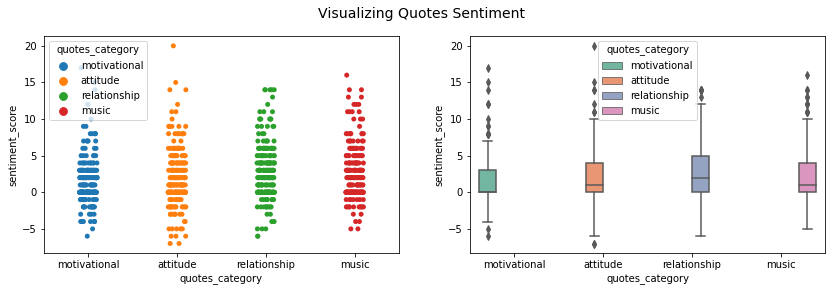

In [144]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sp = sns.stripplot(x='quotes_category', y="sentiment_score",  hue='quotes_category', data=sentiment_frame, ax=ax1)
bp = sns.boxplot(x='quotes_category', y="sentiment_score", hue='quotes_category', data=sentiment_frame, palette="Set2", ax=ax2)
t = f.suptitle('Visualizing Quotes Sentiment', fontsize=14)

C:\Users\Anjum\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


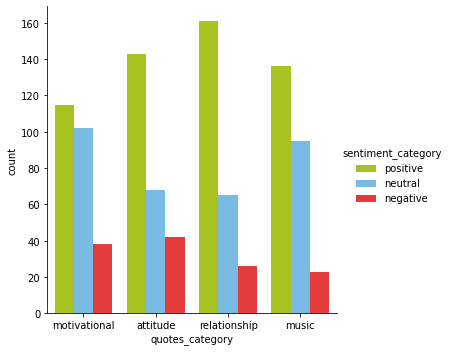

In [145]:
fc = sns.factorplot(x="quotes_category", hue="sentiment_category", 
                    data=sentiment_frame, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})

#### Word Cloud

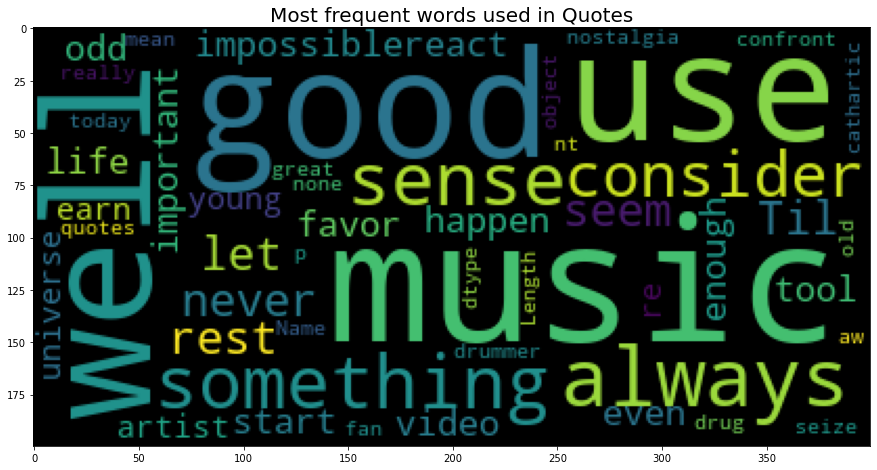

In [154]:
from wordcloud import WordCloud 

wc = WordCloud()
wc.generate(str(df['quotes']))

plt.figure(figsize=(15,8))

plt.title("Most frequent words used in Quotes", fontsize=20,color='black')
plt.imshow(wc)
plt.show()

#### Quotes Classification 

In [156]:
df.quotes_category.unique()

array(['motivational', 'attitude', 'relationship', 'music'], dtype=object)

In [157]:
df['quotes_category_label'] = df['quotes_category'].map({'motivational':0,'attitude':1,'relationship':2,'music':3})

In [158]:
df.head()

,quotes,quotes_category,quotes_category_label
0,good well well never let rest Til good well we...,motivational,0
1,always seem impossible,motivational,0
2,life 10 happen 90 react,motivational,0
3,start use,motivational,0
4,something important enough even odd not favor,motivational,0


#### Feature and Target extraction and train-test split

In [159]:
y = df['quotes_category_label']

X = df['quotes']

In [160]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [161]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(760,)
(254,)
(760,)
(254,)


#### Vectorizing Text data using TF-IDF vectorizer 

In [162]:
from sklearn.feature_extraction.text import TfidfVectorizer

toNumeric = TfidfVectorizer()

In [168]:
toNumeric.fit(X_train)
X_train_dtm = toNumeric.transform(X_train)

X_test_dtm = toNumeric.transform(X_test)

#### Fitting Multinomial NB model

In [205]:
from sklearn.naive_bayes import GaussianNB
mnb = MultinomialNB()

In [206]:
mnb.fit(X_train_dtm, y_train)

MultinomialNB()

In [207]:
y_pred_class = mnb.predict(X_test_dtm)

#### Model Evaluation

In [208]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.7637795275590551

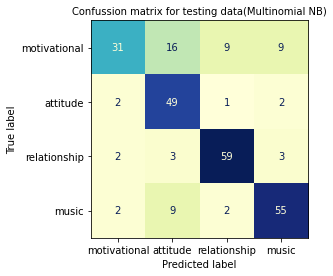

In [209]:
metrics.plot_confusion_matrix(estimator=mnb,X=X_test_dtm,y_true=y_test,
                            cmap="YlGnBu",colorbar=False,display_labels=['motivational', 'attitude', 'relationship', 'music'])

plt.title('Confussion matrix for testing data(Multinomial NB)',size=10)
plt.show()

#### Fitting Logistic Regression model

In [210]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [211]:
lr.fit(X_train_dtm, y_train)

LogisticRegression()

In [212]:
y_pred_class = lr.predict(X_test_dtm)

#### Model Evaluation

In [213]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.889763779527559

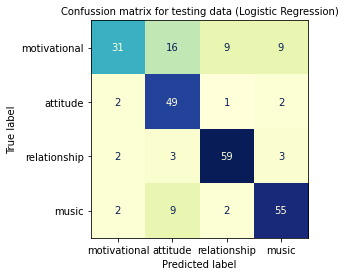

In [203]:
metrics.plot_confusion_matrix(estimator=mnb,X=X_test_dtm,y_true=y_test,
                            cmap="YlGnBu",colorbar=False,display_labels=['motivational', 'attitude', 'relationship', 'music'])

plt.title('Confussion matrix for testing data (Logistic Regression)',size=10)
plt.show()

* We got test accuracy of around 89% with Logistic Regression.

#### Test with single sentence

In [214]:
test_string = 'A strong positive mental attitude will create more miracles than any wonder drug.'

In [222]:
test_string_dtm = toNumeric.transform([test_string])

y_pred_class = lr.predict(test_string_dtm)
y_pred_class

array([1], dtype=int64)

* We tested with random quotes which belongs to attitude category.
* Our model classified it correctly. 